In [8]:
import keras
keras.__version__


'2.14.0'

In [16]:
from keras.models import Sequential #Model oluşturma tipi
from keras.layers import  Dense , Activation #yapay sinir ağını oluşturmak için kullandığımız katman
from keras.optimizers import  SGD

#model oluşturduk

model = Sequential() #nesne aldık
model.add(Dense(64, input_dim = 8, activation= 'relu', name='dense_1')) #dense tam bağımlı katmanlar // input 8 veri ile çalışıyor
#(kaç nöron, ara katmanlar ilk katman arası giriş, her katmanda olan aktivasyon fonksiyonu, bu katmanın adı)

#model.add(Activation('relu')) # bu şekilde de ayrı olara yazabiliyoruz
model.add(Dense(64,activation='relu', name='dense_2')) #genelde ara katmanlarda relu kullanıyoruz
#model.add(Dense(256,activation='relu', name='dense_3'))
#model.add(Dense(128,activation='relu', name='dense_4'))
model.add(Dense(1,activation='sigmoid', name='dense_5')) # ikili sınıflandırma olduğu için yani 0 ve 1 olduğu için sigmoid kullanıyoruz.
#bize 0 ile 1 arası değer verir
model.summary() # model özeti

model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
#modelimizde her 8 li veri için tahmin üretecek. ürettiği tahmin ile  1 arasında bir fark olacak. ikili sınıflandırmadan dolayı binary kullanıyoruz. Maliyeti mizimize etmek için optimize = Adam kullandık. matrix ile de bu modeli hangi formatta kullanacağımızı göstermiş olduk

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                576       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
import numpy as np
dataset = np.loadtxt("/content/drive/MyDrive/deeplearning/4-5. hafta ezberletme/pima-indians-diabetes.csv", delimiter= ',')# veriyi okuyoruz
dataset.shape

#özellik ayırma
X = dataset[:,0:8] #9 kolondan oluşuyor bunları ayırıyoruz ilk 8 i bizim girdi 1 tanewesi de çıktısı

#output
y = dataset[:,8] # son 8 i çıktısı


In [17]:
from sklearn.model_selection import train_test_split # bu fonksiyon bizim için veriyi bölüyor

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.10, random_state =50) #test_size ile %20 test için oluoyor. %80 eğitim için oluyor.
# Eğer validasyon kullanacakasak eğer %10 validasyon %70 eğitim veri seti oluyor

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.10) #validasion için bölme işlemi yapıyoruz


print(X_train.shape)#veri eğitimi için ayrılmış veri datası %70 --> Veri eğitiliyor
print(X_test.shape)#test için ayrılmış veri datası %20 --> Veriyi test ederiz
print(X_valid.shape)#validasyon için ayrılmış veri datası %10 --> Veri Doğrulanıyor

(621, 8)
(77, 8)
(70, 8)


In [19]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=100, batch_size=8 )
# (x ve y eğitim setleri, validasion yapacağımız için x ve y eğitim setleri, eğitimin kaç kere yayılımı tekrarlanacağı, veriyi gruplar halinde gönderiyor ve bu sayede daha hızlı eğitiliyor)

#veri eğitimine başladığımız bölüm burası.
#epochs 512 tane verinin hatalarına bakılarak bir kere ileri yayılım yapıp geri dönmesi toplam hata değeri hesaplanıyor
#validasyon modelin eğitiminin nasıl gittiğine bakmak için yapıyoruz Birinci epochs bittiktten sonra hiç görmediği validasyon verilerini(test verisi de olabilir) işletiyoruz bu sayede eğitimin nasıl gittiğini görmüş oluruz.
#batch_size verideki her veriyi tek tek göndermek yerine gruplar halinde göndermiş oluyoruz

Epoch 1/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7702 - accuracy: 0.6699 - val_loss: 0.8937 - val_accuracy: 0.5143
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7561 - accuracy: 0.6683 - val_loss: 0.6627 - val_accuracy: 0.6714
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 0.8069 - accuracy: 0.6667 - val_loss: 0.6792 - val_accuracy: 0.6286
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6924 - val_loss: 0.5714 - val_accuracy: 0.7429
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6860 - val_loss: 0.6083 - val_accuracy: 0.6857
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5989 - accuracy: 0.7311 - val_loss: 0.6929 - val_accuracy: 0.6571
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.6618 - val_loss: 0.7172 - val_accuracy: 0.6000
Epoch 8/100
7

In [20]:
scores = model.evaluate(X_test, y_test, batch_size =8)# modeli eğittikten sonra oluşan sonucu görüyoruz. (modeli xve y test verileri, gruplar haline göndersin)

print("Los: ",scores[0]) # Modelin kaybı

print("Accuracy :", scores[1]*100) #doğruluk payı

#Accuracy neden güçlü bir değerlendirme ölçütü değildir? Hangi durumlarda sıkıntılıdır ?
# CEVAP :
#Networkü eğittikten sonra belirli çıktılar var. kayıp dopruluk validation gibi çıktılarımız vardır.

10/10 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7662
Los:  0.6536878943443298
Accuracy : 76.6233742237091


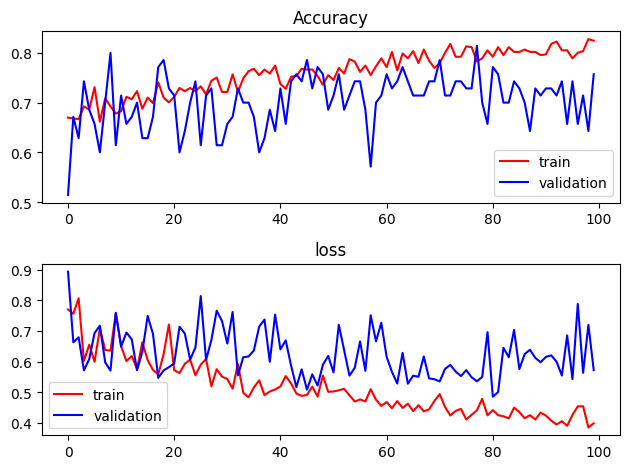

In [21]:
import matplotlib.pyplot as plt

plt.subplot(211)

plt.title("Accuracy")
plt.plot(history.history["accuracy"], color = 'r', label = 'train') # kendi eğittiğimiz
plt.plot(history.history["val_accuracy"], color = 'b', label = 'validation') # validasion
plt.legend(loc='best')

plt.subplot(212)

plt.title("loss")
plt.plot(history.history["loss"], color = 'r', label = 'train')
plt.plot(history.history["val_loss"], color = 'b', label = 'validation')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

#oluşturduğumuz bu görsel ile ezberleme olup olmadığını görüyoruz

In [24]:
y_pred = model.predict(X_test)#her veriye karşılık tahmin üretiyor
y_pred.shape
#y_pred = y_pred.reshape(100) #matrisi satır haline getirdik


#y_pred
#y_test 0 ve 1 lerden oluşan bir matrisim

y_pred[y_pred >= 0.5] = 1 # tahminlerde çıkan sonuca göre büyüklerin1 jüçüklerin 0 sayılmasını istedik

y_pred[y_pred < 0.5] = 0

from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_test, y_pred) # doğru olması gerek veri seti ile thminler

print(cm)

acc = (cm[0][0]+cm[1][1]) / len(y_test)
sen = cm[0][0]/(cm[0][0]+ cm[1][0]) # pozitif vakaları modelin bulma başarısı
spe = cm[1][1]/(cm[1][1]+ cm[0][1]) # true negatifleri false negatiflere bölüyoruz

print("Acc :", acc)
print("Sen :", sen)
print("Spe :", spe)

3/3 [==============================] - 0s 4ms/step
[[45 10]
 [ 8 14]]
Acc : 0.7662337662337663
Sen : 0.8490566037735849
Spe : 0.5833333333333334
